In [1]:
# importing libraries and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\jasik\OneDrive\Documents\Data Analysis\Data\Superstore_Sales.csv')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
data['Postal Code'].fillna('Unknown', inplace = True)

In [7]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
# removing unnecessary columns
data.drop(columns = ['Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID', 'Product Name'], inplace = True)

In [11]:
# data processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9800 non-null   int64  
 1   Order Date    9800 non-null   object 
 2   Ship Date     9800 non-null   object 
 3   Ship Mode     9800 non-null   object 
 4   Segment       9800 non-null   object 
 5   Country       9800 non-null   object 
 6   City          9800 non-null   object 
 7   State         9800 non-null   object 
 8   Region        9800 non-null   object 
 9   Category      9800 non-null   object 
 10  Sub-Category  9800 non-null   object 
 11  Sales         9800 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 918.9+ KB


In [12]:
# changing datatype
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y', errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y', errors='coerce')

# extract day, month and year
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [13]:
data.head()

,Row ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Order Day,Order Month,Order Year
0,1,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,8,11,2017
1,2,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,8,11,2017
2,3,2017-06-12,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,12,6,2017
3,4,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,11,10,2016
4,5,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,11,10,2016


In [14]:
data.shape

(9800, 15)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Ship Date     9800 non-null   datetime64[ns]
 3   Ship Mode     9800 non-null   object        
 4   Segment       9800 non-null   object        
 5   Country       9800 non-null   object        
 6   City          9800 non-null   object        
 7   State         9800 non-null   object        
 8   Region        9800 non-null   object        
 9   Category      9800 non-null   object        
 10  Sub-Category  9800 non-null   object        
 11  Sales         9800 non-null   float64       
 12  Order Day     9800 non-null   int32         
 13  Order Month   9800 non-null   int32         
 14  Order Year    9800 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int3

In [16]:
# Exploratory Data Analysis - EDA

In [17]:
data['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [18]:
data.groupby(['Region'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Central,2277.0,216.357889,636.040148,0.444,14.560,45.920,201.9600,17499.950
East,2785.0,240.401697,626.366105,0.852,17.712,54.960,211.9600,11199.968
South,1598.0,243.524067,779.850548,1.167,17.088,54.114,209.9475,22638.480
West,3140.0,226.184613,524.240789,0.990,19.440,61.002,215.6065,13999.960


In [19]:
data.groupby(['Category'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,2078.0,350.653790,501.489219,1.892,47.19,182.610,435.237,4416.174
Office Supplies,5909.0,119.381001,383.761427,0.444,11.76,27.360,79.470,9892.740
Technology,1813.0,456.401474,1116.818701,0.990,67.98,167.944,453.576,22638.480


In [20]:
data.groupby(['Sub-Category'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub-Category,,,,,,,,
Accessories,756.0,217.178175,337.723800,0.990,47.97450,100.00000,239.97000,3347.370
Appliances,459.0,227.926804,378.006735,0.444,35.15400,83.42000,241.44000,2625.120
Art,785.0,34.019631,60.301752,1.344,7.98000,15.48000,36.44000,1113.024
Binders,1492.0,134.067550,568.099970,0.556,7.99575,18.51600,51.51075,9892.740
Bookcases,226.0,503.598224,641.419280,35.490,187.53200,304.45725,520.01125,4404.900
Chairs,607.0,531.833165,551.180296,26.640,191.06850,359.77200,662.88000,4416.174
Copiers,66.0,2215.880212,3216.185499,299.990,609.98450,1099.98000,2299.96000,17499.950
Envelopes,248.0,65.032444,85.170691,1.632,15.12750,28.57600,71.90250,604.656
Fasteners,214.0,14.027850,12.466864,1.240,5.68500,10.58400,17.90000,93.360


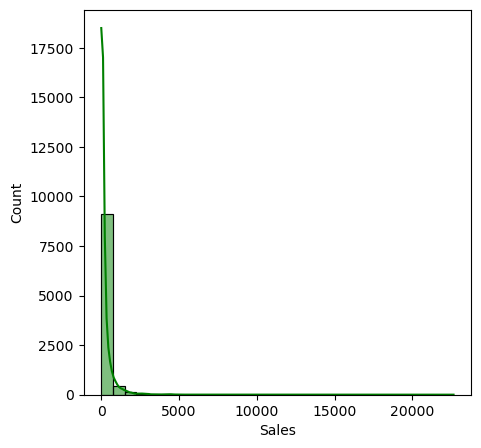

In [21]:
# Data Visualization
plt.figure(figsize = (5,5))
sns.histplot(data['Sales'], kde=True, bins=30, color = 'green')
plt.show()

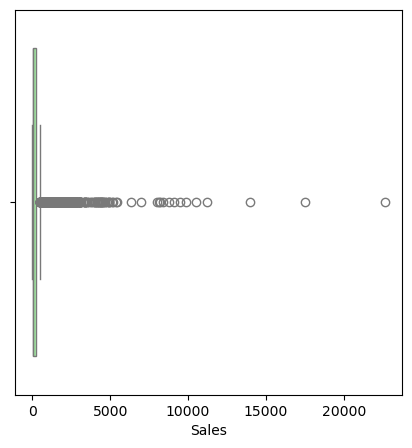

In [22]:
plt.figure(figsize = (5,5))
sns.boxplot(x=data['Sales'], color = '#98FB98')
plt.show()

In [23]:
# Removing Outliers
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

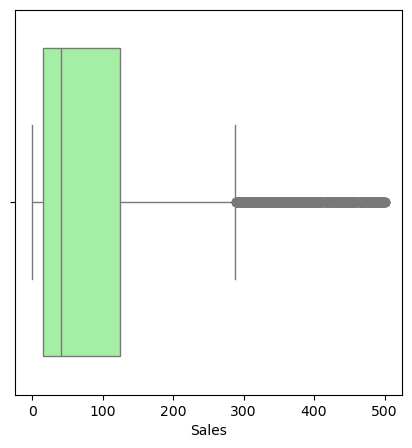

In [24]:
data_clean = data[(data['Sales'] >= lower_lim) & (data['Sales'] <= upper_lim)].copy()
plt.figure(figsize = (5,5))
sns.boxplot(x ='Sales', data=data_clean, color = '#98FB98')
plt.show()

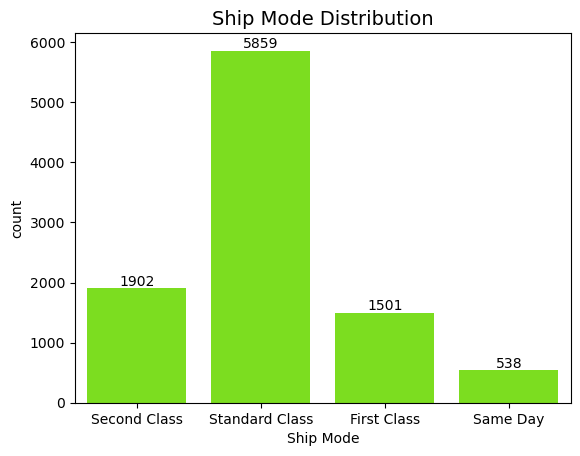

In [25]:
ax = sns.countplot(x=data['Ship Mode'], color = '#7CFC00')
plt.title('Ship Mode Distribution', fontsize = 14)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [26]:
data.groupby(['Category', 'Sub-Category'])['Sales'].describe()

count         mean          std      min  \
Category        Sub-Category                                              
Furniture       Bookcases      226.0   503.598224   641.419280   35.490   
                Chairs         607.0   531.833165   551.180296   26.640   
                Furnishings    931.0    95.823865   148.421490    1.892   
                Tables         314.0   645.893720   598.584981   24.368   
Office Supplies Appliances     459.0   227.926804   378.006735    0.444   
                Art            785.0    34.019631    60.301752    1.344   
                Binders       1492.0   134.067550   568.099970    0.556   
                Envelopes      248.0    65.032444    85.170691    1.632   
                Fasteners      214.0    14.027850    12.466864    1.240   
                Labels         357.0    34.587468    74.802711    2.088   
                Paper         1338.0    57.420257    78.492285    3.380   
                Storage        832.0   263.633885   354.907482    4.464   
                Supplies       184.0   252.284283   938.087746    1.744   
Technology      Accessories    756.0   217.178175   337.723800    0.990   
                Copiers         66.0  2215.880212  3216.185499  299.990   
                Machines       115.0  1645.553313  2765.102088   11.560   
                Phones         876.0   374.180877   494.390228    2.970   

                                    25%         50%         75%        max  
Category        Sub-Category                                                
Furniture       Bookcases     187.53200   304.45725   520.01125   4404.900  
                Chairs        191.06850   359.77200   662.88000   4416.174  
                Furnishings    19.30000    41.96000   107.10500   1336.440  
                Tables        244.15825   450.39000   872.55500   4297.644  
Office Supplies Appliances     35.15400    83.42000   241.44000   2625.120  
                Art             7.98000    15.48000    36.44000   1113.024  
                Binders         7.99575    18.51600    51.51075   9892.740  
                Envelopes      15.12750    28.57600    71.90250    604.656  
                Fasteners       5.68500    10.58400    17.90000     93.360  
                Labels          8.26000    14.94000    28.91000    786.480  
                Paper          14.94000    26.72000    61.96000    733.950  
                Storage        46.53000   112.62000   338.76000   2934.330  
                Supplies       12.55350    27.64500    55.27600   8187.650  
Technology      Accessories    47.97450   100.00000   239.97000   3347.370  
                Copiers       609.98450  1099.98000  2299.96000  17499.950  
                Machines      287.93900   599.98500  2120.93800  22638.480  
                Phones         84.78400   210.86600   479.95250   4548.810

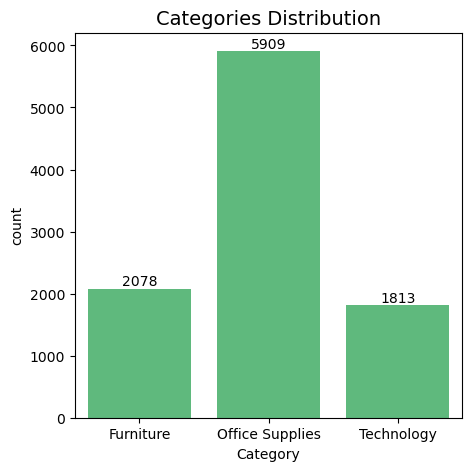

In [27]:
plt.figure(figsize =(5, 5))
cat = sns.countplot(data= data, x='Category', color = '#50C878')
plt.title('Categories Distribution', fontsize = 14)

for i in cat.containers:
    cat.bar_label(i)
plt.show()

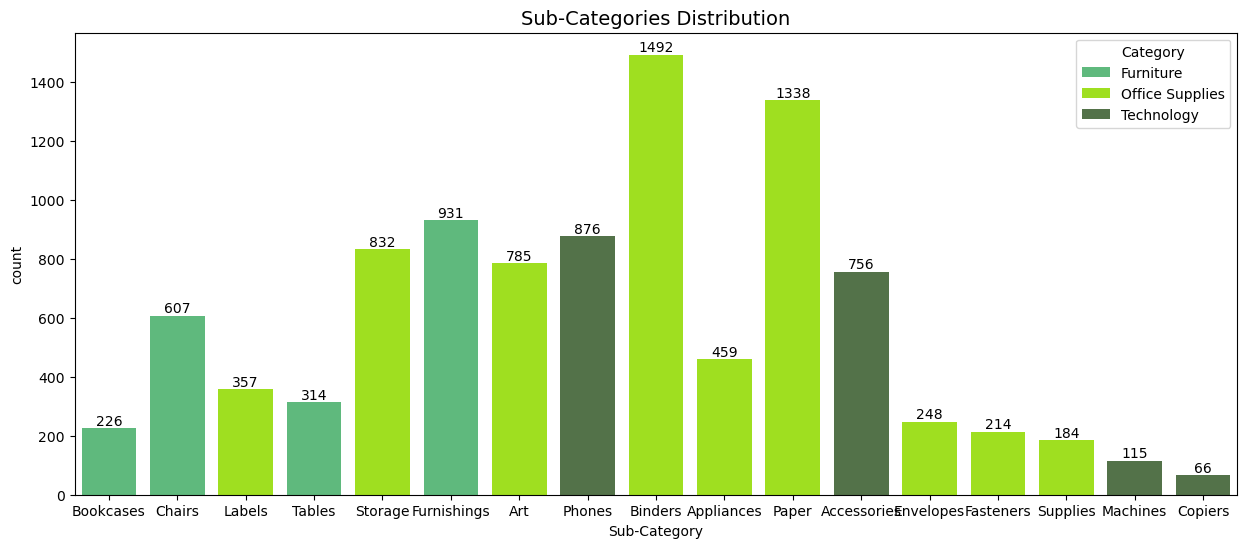

In [28]:
labels= {'Furniture' : '#50C878',
        'Office Supplies' : '#AAFF00',
        'Technology' : '#4F7942'}
         
plt.figure(figsize =(15, 6))
c_s= sns.countplot(data= data, x='Sub-Category', hue='Category', palette = labels)
plt.title('Sub-Categories Distribution', fontsize = 14)


for i in c_s.containers:
    c_s.bar_label(i)
    
plt.show()

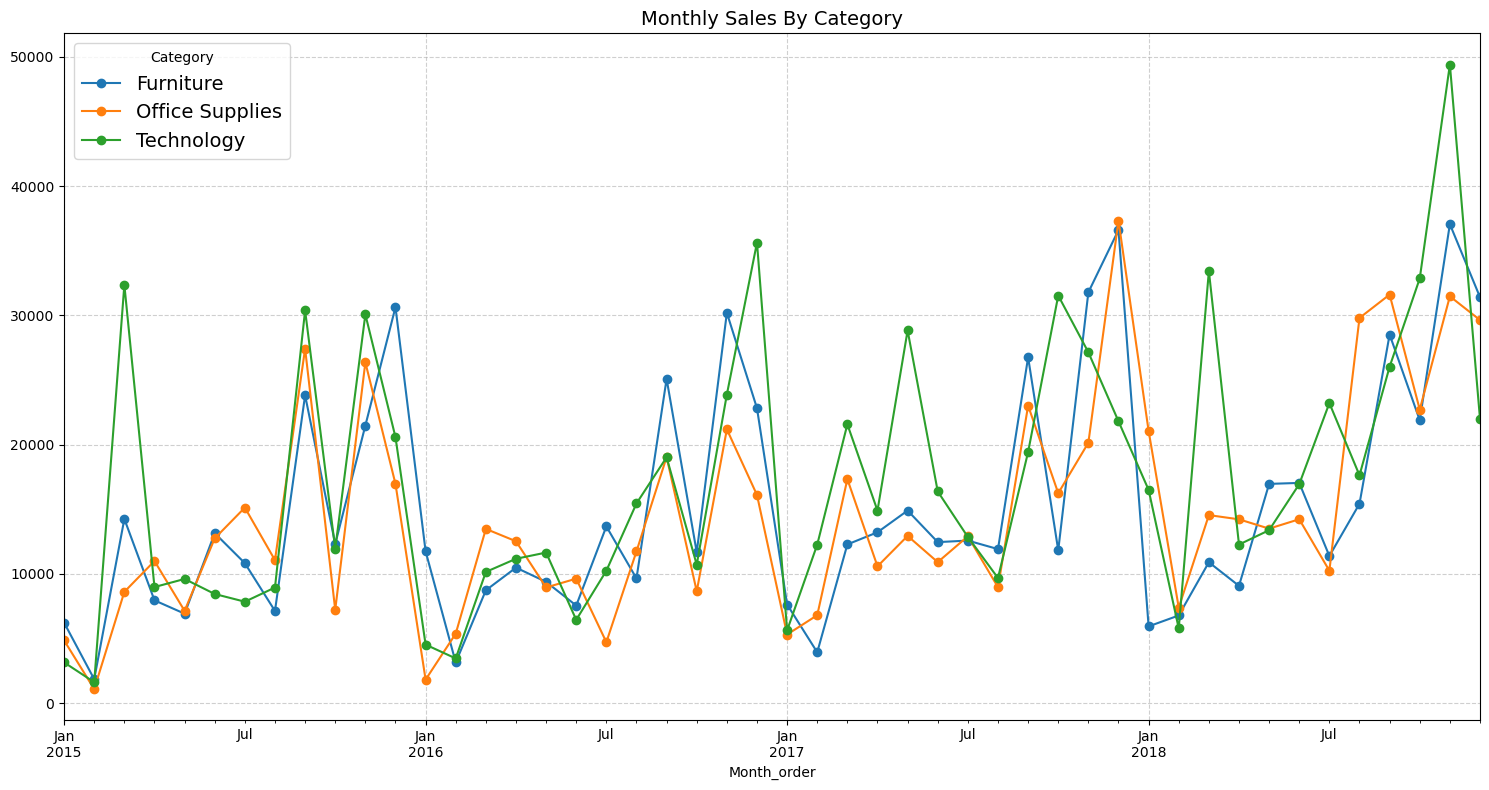

In [29]:
# Monthly Sales
data['Month_order'] = data['Order Date'].dt.to_period('M')
data['Year_order'] = data['Order Date'].dt.to_period('Y')

monthSalesByCategory = data.groupby(["Month_order", "Category"])["Sales"].sum().unstack()

monthSalesByCategory.plot(kind="line", marker="o", figsize=(15, 8), )
plt.title('Monthly Sales By Category', fontsize = 14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Category", fontsize=14)
plt.tight_layout()

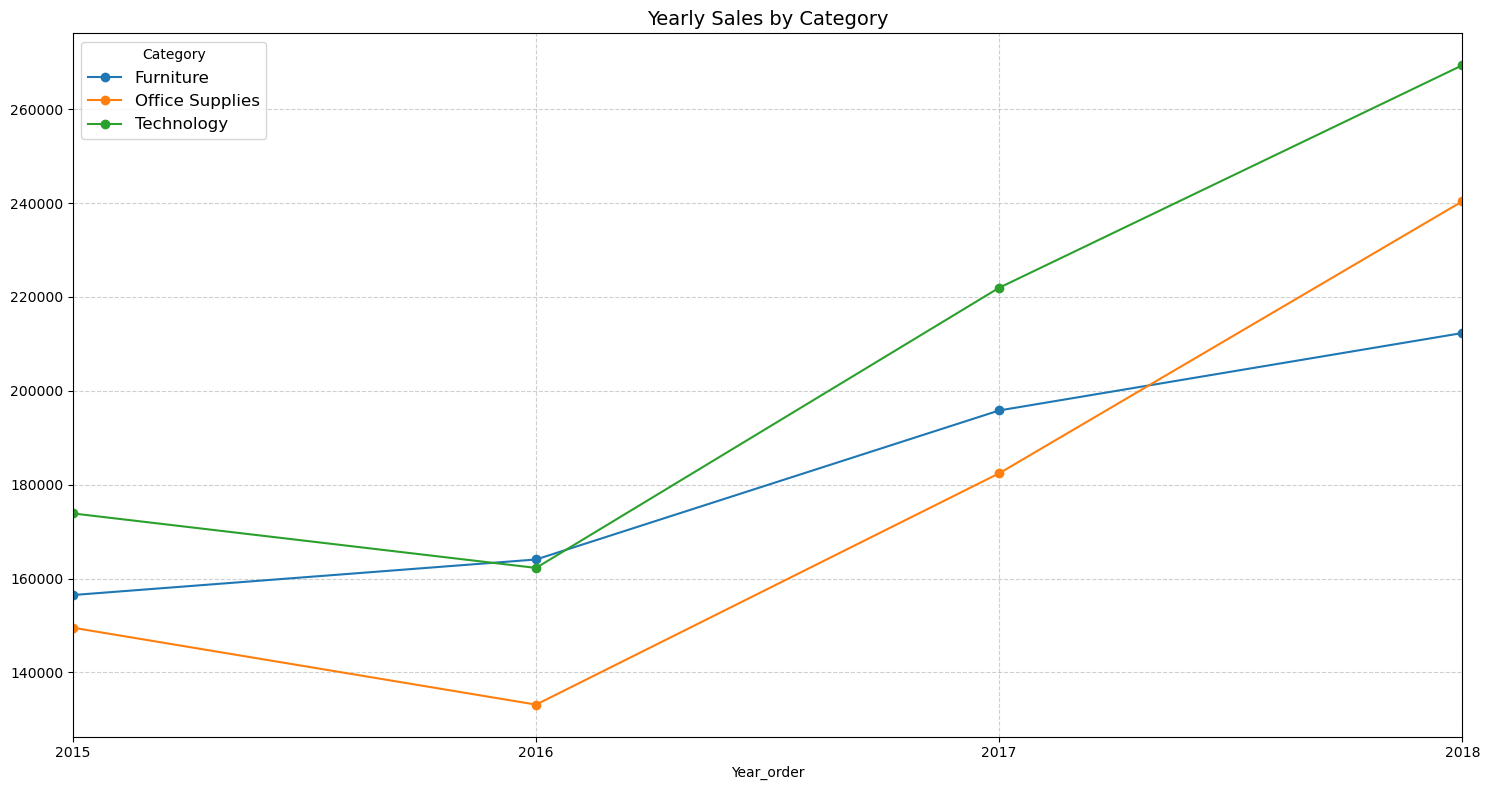

In [30]:
# 4 year sales analysis
yearlyOrder = data.groupby(["Year_order", "Category"])["Sales"].sum().unstack()

yearlyOrder.plot(kind="line", marker="o", figsize=(15, 8))
plt.title("Yearly Sales by Category", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Category", fontsize=12)
plt.tight_layout()

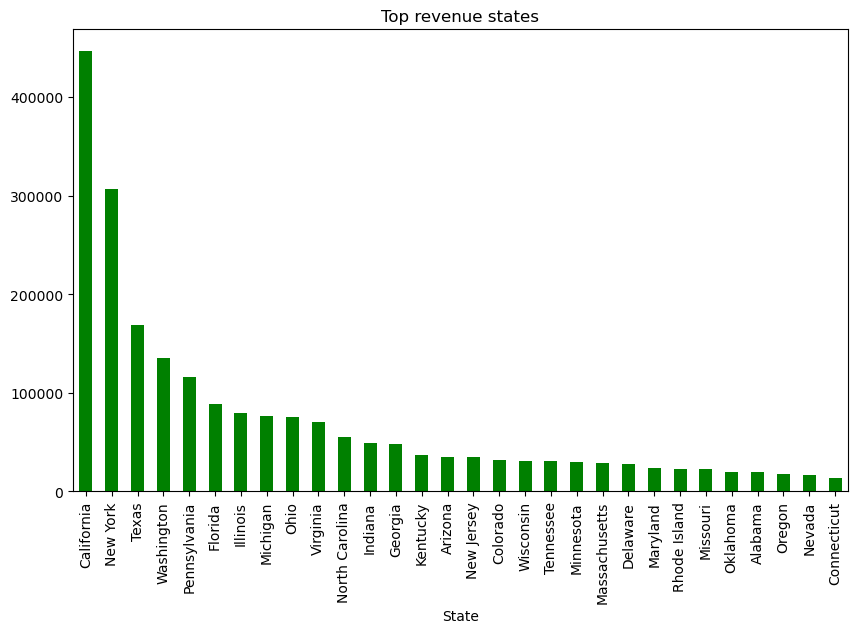

In [31]:
# Top 30 states 
salesState = data.groupby("State")["Sales"].sum()
salesState = salesState.sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 6))
salesState.plot(kind='bar', color='green')
plt.title('Top revenue states')
plt.xticks(rotation=90)
plt.show()

In [32]:
data_clean.apply(lambda x: x.nunique())

Row ID          8655
Order Date      1217
Ship Date       1309
Ship Mode          4
Segment            3
Country            1
City             525
State             48
Region             4
Category           3
Sub-Category      17
Sales           4831
Order Day         31
Order Month       12
Order Year         4
dtype: int64

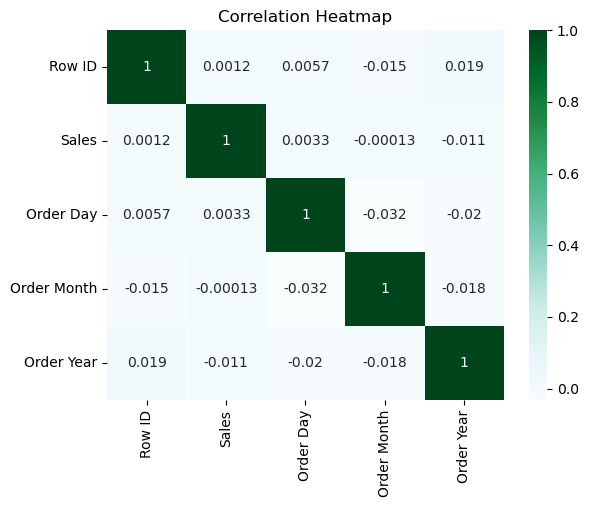

In [33]:
correlation = data.corr(numeric_only = True)
sns.heatmap(correlation, annot=True, cmap= 'BuGn')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
data['Days to Ship'] = (data['Ship Date'] - data['Order Date']).dt.days

In [35]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
x = data[['Days to Ship', 'Order Day', 'Order Month', 'Order Year']]
y = data[['Sales']]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [38]:
model = LinearRegression()

In [39]:
model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [42]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 651271.7595041806
R-squared: -0.004505352140149466


Project By : JASIKA GUPTA

LinkedIn : https://www.linkedin.com/in/jasika-gupta17/

GitHub : https://github.com/jasikagupta04/jasikagupta04


Thank You!